In [ ]:
# class Kmeans:
#     def __init__(self):
#         print("A")

#     def fit(self, X, K, n_init, max_iter=300, tol=1e-4, distance_metric="euclidean"):
#         labels = []
#         num_clusters = K
#         # Get the cluster centroids
#         num_data_point = len(X)
#         random_num = np.random.randint(num_data_point, size=1)
#         centroid = [X[random_num]]
#         for k in range(1, num_clusters):
#             distance = []
#             distribution_proportion = []
#             for n in num_data_point:
#                 if distance_metric == "euclidean":
#                     distance.append(np.min([(euclidean_metrics(X[n], centroid[i])) for i in k]))
            
#             total_distance = np.sum(distance)
#             for n in num_data_point:
#                 distribution_proportion.append((np.square(distance[n]))/total_distance)
                
#             index_max_dp = np.where(distribution_proportion == np.max(distribution_proportion))
#             centroid[k] = X[index_max_dp]
        
#         # Getting labels
#         for n in num_data_point:
#             distance_dp_centroid = [euclidean_metrics(X[n], centroid[k]) for k in num_clusters]
#             cluster = np.where(distance_dp_centroid == np.min(distance_dp_centroid))
#             labels.append(cluster)    
            
#         return labels

#     def score(self, X):
#         return 0.0

In [2]:
def silhouette_score(x, labels):

    a = []
    b = []
    score = []
    for i in range(len(labels)):
        a.append(intra_cluster_distance(x, labels, i))
        b.append(nearest_cluster_distance(x, labels, i))
        score.append((b[i] - a[i]) / (np.maximum(a[i], b[i])))

    return np.mean(score)

In [5]:
def intra_cluster_distance(x, labels, i):
    same_cluster_indices = np.where(labels == labels[i])[0]
    if len(same_cluster_indices) == 0:
        a = 0
    else:
        distance = []
        for j in same_cluster_indices:
            if j != i:
                distance.append(euclidean_metrics(x[i], x[j]))
        a = np.mean(distance)

    return a

In [6]:
def nearest_cluster_distance(x, labels, i):
    different_cluster_indices = np.where(labels != labels[i])[0]
    if len(different_cluster_indices) == 0:
        b = 0
    else:
        distance_dict = {}
        for j in different_cluster_indices:
            key = labels[j]
            if key in distance_dict.keys():
                distance_dict[key].append(euclidean_metrics(x[i], x[j]))
            else:    
                distance_dict.update({key: [euclidean_metrics(x[i], x[j])]})
        
        mean_distance = []
        for row in distance_dict.values():
            mean_distance.append([np.mean(row)])
        
        min_mean_distance = np.min(mean_distance)
        b = min_mean_distance
    return b

In [36]:
def euclidean_metrics(x, y):
    distance_xy = np.square(np.subtract(x, y))
    sum_distance = np.sum(distance_xy)

    return np.sqrt(sum_distance)

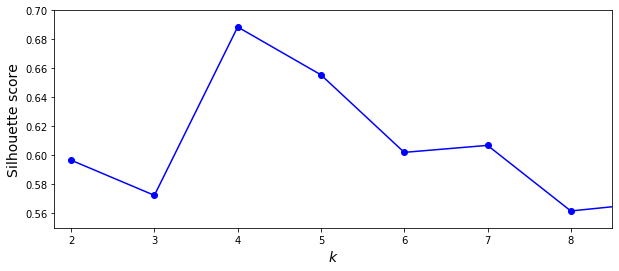

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])


x, y = make_blobs(n_samples=2000, centers=blob_centers,
                    cluster_std=blob_std, random_state=7)

# kmeans = KMeans()
# kmeans.fit()

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x)
                    for k in range(1, 10)]

# getting the silhouette score
silhouette_scores = [silhouette_score(x, model.labels_)
                        for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()


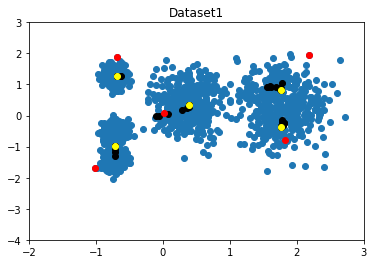

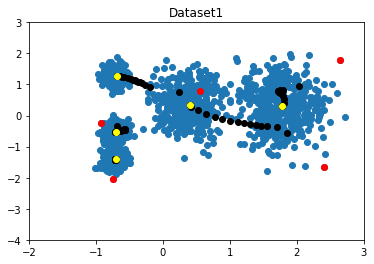

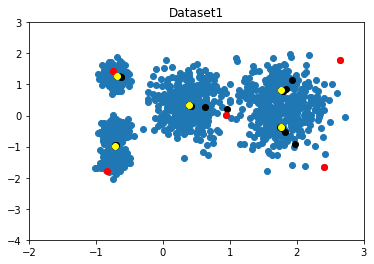

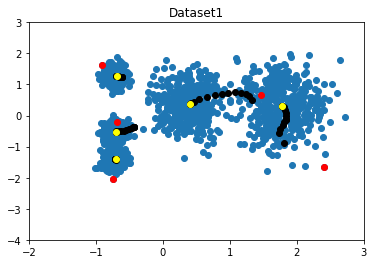

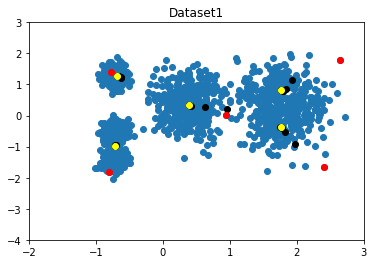

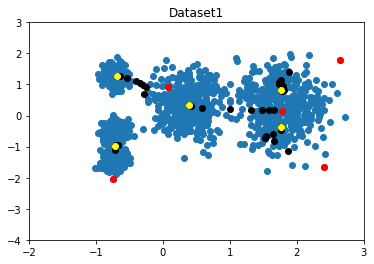

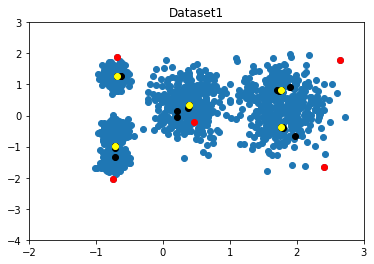

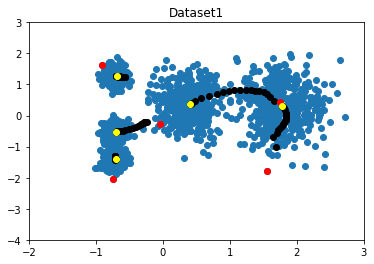

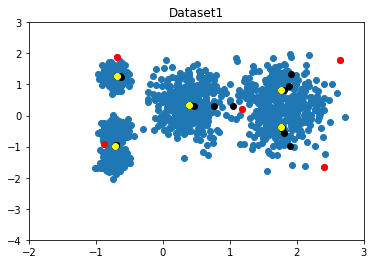

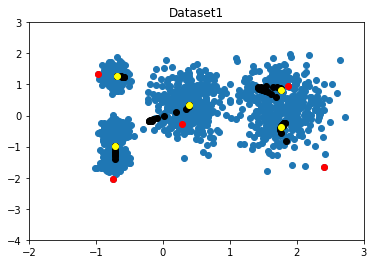

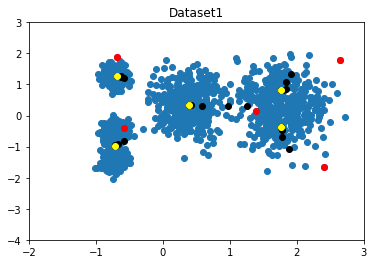

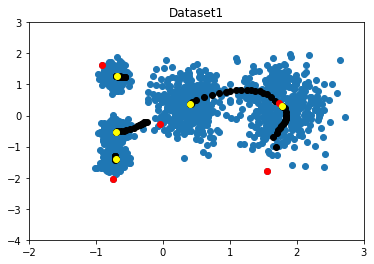

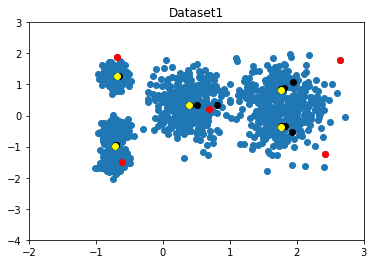

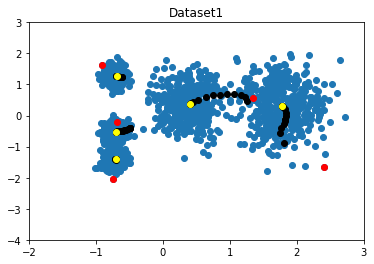

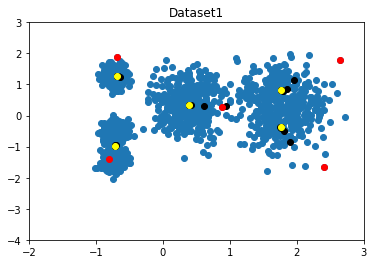

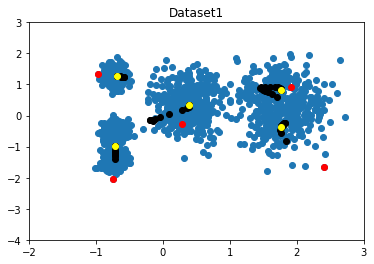

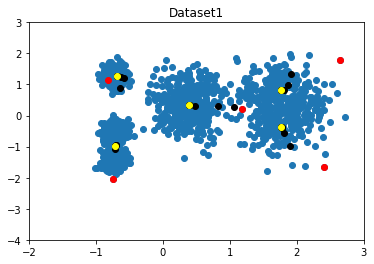

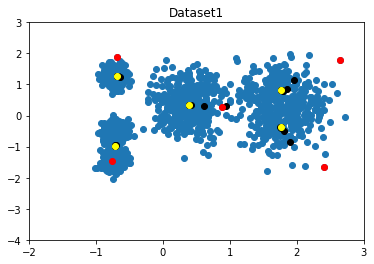

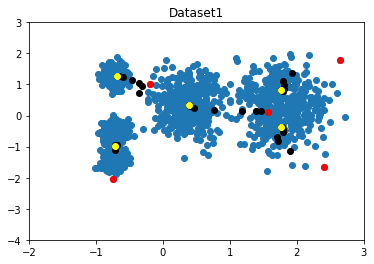

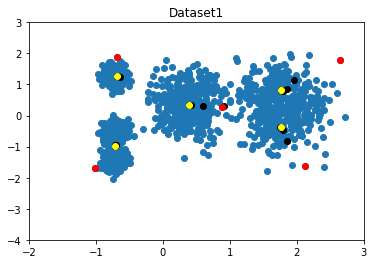

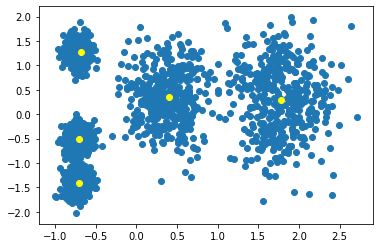

In [1]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import math
from sklearn.datasets import make_blobs


def fit(self, X, k, n_init, max_iter=300, tol=1e-4, distance_metric="euclidean"):
    bestInertia = math.inf
    for y in range(0,n_init):
        
        previousInertia = math.inf
    
        X1 = X[:,0]
        X2 = X[:,1]
    
        plt.plot() 
        plt.xlim([-2, 3]) 
        plt.ylim([-4, 3]) 
        plt.title('Dataset1') 
        plt.scatter(X1, X2)
    
        rowsOfData = X.shape[0];
    
        #K-Means++ ************
    
        #get a random centroid
        random = X[np.random.randint(rowsOfData, size=1), :]

        centroids = np.array(random)
    
        #plot first centroid
        plt.scatter(centroids[:,0], centroids[:,1], color = 'red', zorder=10)

        #getting initial centroids
        for a in range(k-1):
            farthestDist = 0
            for b in range(rowsOfData):
                closestDistToCentroid = math.inf
                for c in range(centroids.shape[0]): 
                    distanceToACentroid = np.linalg.norm(X[b,:]-centroids[c,:])
                    if closestDistToCentroid > distanceToACentroid:
                        closestDistToCentroid = distanceToACentroid
                        closestCentroid = centroids[c,:]
            
                distToClosestCentroid = np.linalg.norm(X[b,:]-closestCentroid)
                if distToClosestCentroid > farthestDist:
                    farthestDist = distToClosestCentroid
                    farthestPoint = X[b,:]
        
            #add and plot new centroid
            centroids = np.vstack([centroids, farthestPoint])
            plt.scatter(farthestPoint[0], farthestPoint[1],  color = 'red', zorder=10)
        
        
        #END K-Means++ ************
    
    
        for z in range(0,max_iter):
            #K-Means Assignment step **************
    
    
            #keeps the coords of closest centroid for each point
            closestCentroidArray = np.zeros(shape=(rowsOfData,2))
        
            for a in range(rowsOfData):
                closestDistToCentroid = math.inf
                for b in range(k): 
                    distanceToACentroid = np.linalg.norm(X[a,:]-centroids[b,:])
                    if closestDistToCentroid > distanceToACentroid:
                        closestDistToCentroid = distanceToACentroid
                        closestCentroid = centroids[b,:]
                closestCentroidArray[a] = closestCentroid
    
    
            #K-Means Recenter step **********

    
            #adds up all of the X plots for that centroid
            sumOfAllX = np.zeros(shape=(k,1))
            sumOfAllY = np.zeros(shape=(k,1))
    
            #keeps the number of points that are closest to that centroid
            numberOfClosePoints = np.zeros(shape=(centroids.shape[0],1))
    
    
            for a in range(rowsOfData):
                for b in range(k): 
                    if closestCentroidArray[a,0] == centroids[b,0] and closestCentroidArray[a,1] == centroids[b,1]:
                        sumOfAllX[b,0] = sumOfAllX[b,0] + X[a,0]
                        sumOfAllY[b,0] = sumOfAllY[b,0] + X[a,1]
                        numberOfClosePoints[b] = numberOfClosePoints[b] + 1
                
                
            MeanOfX = np.zeros(shape=(k,1))    
            MeanOfY = np.zeros(shape=(k,1)) 
    
            #get the new cluster centers
            for a in range(k):
                MeanOfX[a,0] = sumOfAllX[a,0]/numberOfClosePoints[a]
                MeanOfY[a,0] = sumOfAllY[a,0]/numberOfClosePoints[a]
        
            plt.scatter(MeanOfX, MeanOfY, color="black", zorder=5) 
        
        
            #get score of this test
        
            inertia = 0
            for a in range(rowsOfData):
                inertia = inertia + (np.linalg.norm(X[a]-closestCentroidArray[a]))**2
        
        
            #run kmeans until inertia is less than tolerance
            if tol > previousInertia - inertia:  
                break
            
            previousInertia = inertia
        
            #new centroids
            for a in range(k):
                centroids[a,0] = MeanOfX[a,0]
                centroids[a,1] = MeanOfY[a,0]
        
        
        plt.scatter(MeanOfX, MeanOfY, color="yellow", zorder=20) 
        plt.show() 
    
    #get best result
        if bestInertia > inertia:
            bestInertia = inertia
            bestCentroids = centroids
            
    plt.scatter(X1, X2)
    plt.scatter(bestCentroids[:,0], bestCentroids[:,1], color="yellow", zorder=20) 
    plt.show()
    
    
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])


blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

#all_data = pd.read_csv('/Users/crystalwarta/Downloads/movies_metadata.csv')

#all_data = all_data.dropna()

#all_data.drop(all_data[all_data['vote_count'] <= 30 ].index, inplace=True)

#my_data = all_data[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].copy()
#my_data = all_data[['budget', 'popularity']].copy()

#col_names = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
#col_names = ['budget', 'popularity']

scaler = StandardScaler()



X = scaler.fit_transform(X)

#X = my_data.to_numpy()

#print(X)

fit(1, X, 5, 20)




In [33]:
 def RangeQuery(X, distance_metric, p, eps):
        neighbors = []
        if distance_metric == "euclidean":
            for index in range(len(X)):
                if euclidean_metrics(X[index], p) <= eps:
                    neighbors.append(index)

        return neighbors

In [34]:
from sklearn.datasets import make_blobs, make_circles

class DBSCAN:

    def __init__(self):
        pass

    def fit(self, X, eps, min_samples, distance_metric="euclidean"):
     
        cluster_num = 0
        noise = -1
        undefined = -2

        labels = np.empty(len(X)) # creating a list of empty array as labels
        labels.fill(undefined)  # fill the empty list with undefined values
        
        for index in range(len(X)): # iterating over each points index in data points
            if labels[index] != undefined:
                continue
            neighbors_indices = RangeQuery(X, distance_metric, X[index], eps)

            if len(neighbors_indices) < min_samples:
                labels[index] = noise
                continue

            cluster_num += 1
            labels[index] = cluster_num
            neighbors_indices = np.asarray([x for x in neighbors_indices if x != index])

            restart_loop = 0
            while restart_loop == 0:
                restart_loop = -1
                for i in neighbors_indices:
                    if labels[i] == noise:
                        labels[i] = cluster_num
    
                    elif labels[i] != undefined:
                        continue
    
                    labels[i] = cluster_num
                    new_neighbors_indices = RangeQuery(X, distance_metric, X[i], eps)
                    if len(new_neighbors_indices) >= min_samples:
                        neighbors_indices = np.union1d(neighbors_indices, new_neighbors_indices)
                        restart_loop = 0
                        break  
                    
        return labels



In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 

data = pd.read_csv('./movies_metadata.csv')

if np.any(data.isnull()):
    data = data.dropna()

#drop all the data that has less than 30 votes
data.drop(data[data.vote_count <= 30 ].index, inplace=True)

col_names = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

data = data[col_names]

# print(data.head())
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
try:
    data_scaled = scaler.fit_transform(data) 
except:
    pass

# print(data_scaled)


dbscan = DBSCAN()
labels = dbscan.fit(data_scaled, eps=0.5, min_samples=5, distance_metric="euclidean")
print(np.unique(labels))

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[-1.  1.  2.]


In [19]:
pip install pandas

     |████████████████████████████████| 9.8MB 7.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
